Cargando recursos necesarios...
Recursos cargados.
traduciendo opiniones...


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/danielmalvaez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/danielmalvaez/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


limpiando opiniones...
Cierra la imagen para continuar...
Puntaje Total: 4.624500665778961 estrellas
El índice de 'Buena' es: 1
El índice de 'Regular' es: 0
El índice de 'Mala' es: 269
Buena index :  1
Regular index :  0
Mala index :  269
True
PDF generado como : Reporte del curso Higiene de Manos.pdf


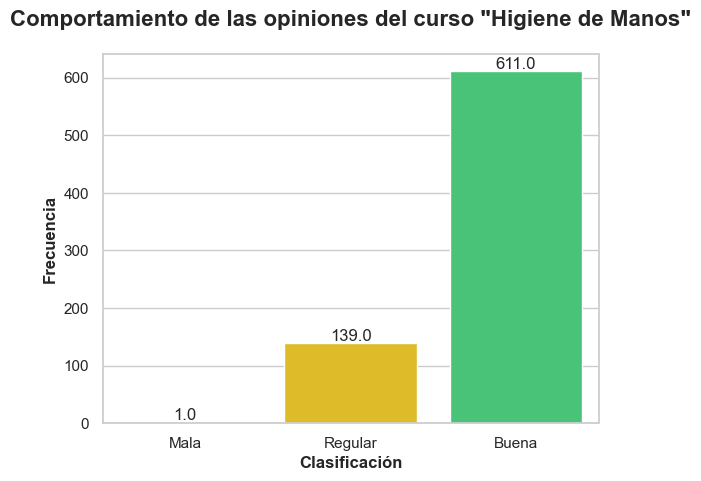

In [23]:
'''
Sentiment Analyzer for Course Reviews in the AESCULAP ACADEMY platform.

Author : Daniel Malváez
Version : 1.0.0
Date : 2023-10-14

Catching up the notebook:
    1. Install the required libraries:
        $ pip3 install -r requirements.txt
    2. Run the script:
        $ python3 AnalisisSentimientos.py Excel_File Course_Name
    3. The script will generate a PNG image with the results and a PDF report.
    4. The PNG image will be saved as "Opiniones.png"
    5. The PDF report will be saved as "Reporte Higiene Manos.pdf"
    6. The script will print the total score of the course in stars.
    7. The script will print the PDF path.
'''
# ------------------------------------
# Important libraries for the analysis
# ------------------------------------
# Data Manipulation & Visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Text Preprocessing
from deep_translator import GoogleTranslator

# Sentiment Analysis
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from unidecode import unidecode

# Report Generation
from reportlab.lib.pagesizes import letter
from reportlab.lib import colors
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image, Frame
from reportlab.lib.styles import getSampleStyleSheet

# Regular Expressions
import re

# System
import sys

# DateTime
import datetime

# ------------------------------
# Defining the functions to use
# ------------------------------
def quitar_caracteres_especiales(texto):
    # Utiliza una expresión regular para eliminar caracteres especiales excepto los acentos
    texto_limpio = re.sub(r'[^a-zA-Z\sáéíóúñ]', '', texto)
    return texto_limpio

def traducir(opinion):
    opinion_trad = GoogleTranslator(source='es', target='en').translate(opinion)
    opinion_trad = unidecode(opinion_trad)
    opinion_trad = opinion_trad.lower()
    opinion_trad = re.sub(r'[^\w\s]', '', opinion_trad)
    return opinion_trad

def quitar_stops(texto, stop_words = stopwords.words('english')):
    texto_limpio = ' '.join([word for word in texto.split() if word not in stop_words])
    return texto_limpio

print('Cargando recursos necesarios...')

nltk.download('stopwords')
nltk.download('vader_lexicon')

print('Recursos cargados.')

# Obtaining the arguments
excel_file = 'Curso1.xlsx'
course_name = 'Higiene de Manos'

# Reading the excel file
opinions = pd.read_excel(excel_file, sheet_name = 'Opiniones')

# Obtaining the opinions
pos_ops = [2+(3*x) for x in range(788)]
opinions_only = list([opinions.iloc[x]['OPINIONES'] for x in pos_ops])

# --------------------------
# Preprocessing the opinions
# --------------------------
opinions_only = [quitar_caracteres_especiales(str(x).strip().lower()) for x in opinions_only]
df = pd.DataFrame(opinions_only, columns = ['Opiniones'])
df[df['Opiniones'] == 'nan'] = np.nan
df[df['Opiniones'] == ''] = np.nan
df.dropna(inplace = True)
df.reset_index(drop = True, inplace = True)
opinions_only = df['Opiniones'].tolist()

print('traduciendo opiniones...')
df_trad = df.applymap(traducir)

print('limpiando opiniones...')
df_cleaned = df_trad.applymap(quitar_stops)

# --------------------------
# Sentiment Analysis
# --------------------------
sia = SentimentIntensityAnalyzer()

# Obtaining the opinions as a list
opinions_cleaned = df_cleaned['Opiniones'].tolist()

# Polarity scores
polarity_scores = [sia.polarity_scores(review)['compound'] for review in opinions_cleaned]

# Defining the ranges for the polarity scores
rangos = np.linspace(-1,1, 4)
etiquetas = ['Mala', 'Regular', 'Buena']

# Obtaining the ranges for the polarity scores
polarity_ranges = pd.cut(polarity_scores, bins=rangos, labels=etiquetas)

# --------------------------
# Data Visualization
# --------------------------
colores = ['#FC540B', '#FCCD0B', '#35D773']

# Style
sns.set(style='whitegrid')
sns.set_palette(colores)

# Figure
ax = sns.countplot(x=polarity_ranges)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

# Labels and Title
plt.xlabel('Clasificación', fontweight='bold', labelpad=4, fontfamily='Arial')
plt.ylabel('Frecuencia', fontweight='bold', labelpad=4, fontfamily='Arial')
plt.title('Comportamiento de las opiniones del curso "Higiene de Manos"',
            fontsize=16, fontweight='bold', pad=20, loc='center', fontfamily='Arial')

# Save the figure and show
plt.savefig('Opiniones.png', dpi=300, bbox_inches='tight', format="png")
#plt.show()

print('Cierra la imagen para continuar...')

# --------------------------
# Generating the PDF report
# --------------------------

total_opinions = len(df_cleaned)
good_ops = polarity_ranges.value_counts()['Buena']
regular_ops = polarity_ranges.value_counts()['Regular']
bad_ops = polarity_ranges.value_counts()['Mala']

# We set the score for each type of opinion
score_bad = 1
score_regular = 3
score_good = 5

# Calculate the overall score
overall_score = (bad_ops * score_bad) + (regular_ops * score_regular) + (good_ops * score_good)

# Print the overall score
print(f"Puntaje Total: {overall_score / total_opinions} estrellas")

# Create a PDF file
pdf_path = f"Reporte del curso {course_name}.pdf"
doc = SimpleDocTemplate(pdf_path, pagesize=letter)

# Create a list to hold the story (elements to be added to the PDF)
story = []

# Define styles
styles = getSampleStyleSheet()
normal_style = styles["Normal"]
title_style = styles["Title"]
bold_style = styles["Normal"]
bold_style.fontName = "Helvetica-Bold"  # Establecer fuente en negrita

# Add the current date and author
current_date = datetime.datetime.now().strftime("%Y-%m-%d")
author = "Axel Daniel Malváez Flores"  # Reemplaza con el nombre del autor

date_paragraph = Paragraph(f"<b>Fecha del Informe:</b> {current_date}", bold_style)
author_paragraph = Paragraph(f"<b>Autor:</b> {author}", bold_style)

story.append(date_paragraph)
story.append(author_paragraph)
story.append(Spacer(1, 12))

# Add a title to the PDF
title = Paragraph(f"Informe de Análisis de Sentimientos para el Curso {course_name}", title_style)
story.append(title)
story.append(Spacer(1, 12))

# Add content to the PDF
content = f"""
La siguiente gráfica nos muestra la cantidad de opiniones malas, regulares y buenas.
En este caso tenemos {total_opinions} opiniones en total, de las cuales {good_ops}
son buenas, {regular_ops} son regulares y {bad_ops} son malas.
"""

content2 = f"""
Si tuvieramos que calificar el curso de 0 a 5 estrellas, el puntaje sería de:
{overall_score / total_opinions} estrellas.
"""

# Add an image to the PDF
original_width = 640
original_height = 480
scale_factor = 0.5

new_width = int(original_width * scale_factor)
new_height = int(original_height * scale_factor)

image = Image("Opiniones.png", width=new_width, height=new_height)
story.append(image)

content_paragraph = Paragraph(content, normal_style)
story.append(content_paragraph)
story.append(Spacer(1, 12))
content_paragraph2 = Paragraph(content2, normal_style)
story.append(content_paragraph2)
story.append(Spacer(1, 12))

# Obtenemos un ejemplo de cada tipo de comentario
buena_index = -1
regular_index = -1
mala_index = -1

example_good_comment = ''
example_regular_comment = ''
example_bad_comment = ''

elemento_buscado = 'Buena'
if elemento_buscado in list(polarity_ranges):
    buena_index = list(polarity_ranges).index(elemento_buscado)
    print(f"El índice de '{elemento_buscado}' es: {buena_index}")
else:
    print(f"'{elemento_buscado}' no se encuentra en la lista.")

elemento_buscado = 'Regular'
if elemento_buscado in list(polarity_ranges):
    regular_index = list(polarity_ranges).index(elemento_buscado)
    print(f"El índice de '{elemento_buscado}' es: {regular_index}")
else:
    print(f"'{elemento_buscado}' no se encuentra en la lista.")

elemento_buscado = 'Mala'
if elemento_buscado in list(polarity_ranges):
    mala_index = list(polarity_ranges).index(elemento_buscado)
    print(f"El índice de '{elemento_buscado}' es: {mala_index}")
else:
    print(f"'{elemento_buscado}' no se encuentra en la lista.")

idx = [buena_index, regular_index, mala_index]
for i in range(len(idx)):
    if idx[i] != -1 and i == 0:
        example_good_comment = opinions_only[idx[i]]
    elif idx[i] != -1 and i == 1:
        example_regular_comment = opinions_only[idx[i]]
    elif idx[i] != -1 and i == 2:
        example_bad_comment = opinions_only[idx[i]]
    else:
        continue

story.append(Paragraph("Ejemplos de Comentarios:", normal_style))
story.append(Spacer(1, 12))
story.append(Paragraph(f"Comentario Bueno: {example_good_comment}", normal_style))
story.append(Spacer(1, 12))
story.append(Paragraph(f"Comentario Neutro: {example_regular_comment}", normal_style))
story.append(Spacer(1, 12))
story.append(Paragraph(f"Comentario Malo: {example_bad_comment}", normal_style))

# Build the PDF
doc.build(story)
print(f"PDF generado como : {pdf_path}")

In [27]:
opinions_only

['esta muy completo con profesionales muy capacitados',
 'excelente curso impartido para los profesionales de salud ya que es una medida de protección básica que todos debemos de seguir en los lugares de trabajo para evitar la transmisión de patógenos agradecer a los ponentes por compartir sus conocimientos en este curso que impartieron de excelente calidad cada una de las ponencias',
 'gracias por contribuir a seguir actualizandonos como profesionales de la salud y estar siempre a la vanguardia',
 'excelente curso para aprender yo confirmar nuestros conocimientos y lo más importante las estrategias que recomiendan para continuar trabajando por este gran programa en pro de nuestrs pacientes y por ende de nosotrs como personal sanitario muchas gracias ',
 'uno pensaría que lo sabe todo sobre cómo y cuándo lavarse las manos sin embargo con este curso se cae en cuenta de que quizá no todo está dado por sentado muy recomendable',
 'excelente trabajo por parte de los ponentes que tubieron l

In [28]:
# Obtenemos un ejemplo de cada tipo de comentario
buena_index = -1
regular_index = -1
mala_index = -1

example_good_comment = ''
example_regular_comment = ''
example_bad_comment = ''

elemento_buscado = 'Buena'
if elemento_buscado in list(polarity_ranges):
    buena_index = list(polarity_ranges).index(elemento_buscado)
    print(f"El índice de '{elemento_buscado}' es: {buena_index}")
else:
    print(f"'{elemento_buscado}' no se encuentra en la lista.")

elemento_buscado = 'Regular'
if elemento_buscado in list(polarity_ranges):
    regular_index = list(polarity_ranges).index(elemento_buscado)
    print(f"El índice de '{elemento_buscado}' es: {regular_index}")
else:
    print(f"'{elemento_buscado}' no se encuentra en la lista.")

elemento_buscado = 'Mala'
if elemento_buscado in list(polarity_ranges):
    mala_index = list(polarity_ranges).index(elemento_buscado)
    print(f"El índice de '{elemento_buscado}' es: {mala_index}")
else:
    print(f"'{elemento_buscado}' no se encuentra en la lista.")


El índice de 'Buena' es: 1
El índice de 'Regular' es: 0
El índice de 'Mala' es: 269
